In [1]:
from pymongo import MongoClient
import utils.courses
import certifi
import os
from dotenv import load_dotenv
from utils.courses import find_courses_by_name, retrieve_lessons_text, concatenate_lessons_text, encode_course, PCA_course_encodings, plot_course_encodings, get_google_translations_from_txt, encode_course_by_lesson, pca_encodings_by_lesson, plot_labeled_pca_vectors, calculate_intracluster_pairwise_distances, calculate_intercluster_pairwise_distances

c:\Users\Usuario\Desktop\monitoria\analisis_traducciones\monenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loads the path for GCP translation API and env vars
load_dotenv()

True

In [3]:
MONGO_URI = os.environ["MONGO_DB_URI"]

In [4]:
#Load the gcf data from the MongoDB db
ca = certifi.where()
cluster = MongoClient(host=MONGO_URI, tlsCAFile=ca)
db = cluster["gcfglobal"]
collection = db["lesson"]

## Análisis de los tutoriales

In [5]:
#Retrieve all the tutorials from the db
collection_tutorials = db['tutorial']

# Get the Courses Content

In [6]:
paths = [
    ('como-usar-o-twitter', 'como-usar-twitter'),
    ('excel-2016',), 
    ('microsoft-excel-2010',), 
    ('microsoft-word-2010',), 
    ('powerpoint-2019',), 
    ('word-2016',),
    ('algebra',), 
    ('credito',), 
    ('curso-de-fotografia-digital',), 
    ('curso-de-photoshop',), 
    ('informatica-basica',),
    ('whatsapp-business',), 
    ('virus-e-antivirus','virus-informaticos-y-antivirus'),
    ('criacao-de-sites','creacion-de-sitios-web'),
    ('seguranca-na-internet', 'seguridad-en-internet'),
    ('criar-um-correio-eletronico', 'crear-un-correo-electronico'),
    ('como-criar-um-blog', 'crear-un-blog-en-internet'),
    ('apresentacoes-basicas', 'presentaciones-basicas'),
    ('como-usar-o-telegram', 'curso-de-telegram'),
    ('tudo-sobre-o-windows-10', 'como-usar-windows-10'),
    ('como-usar-o-sistema-android', 'como-usar-android'),
    ('criar-uma-conta-no-facebook', 'crear-cuenta-en-facebook'),
    ('aplicativos', 'aplicaciones'),
    ('google-sala-de-aula-para-alunos', 'google-classroom-para-estudiantes'),
    ('somar-e-subtrair', 'sumar-y-restar'),
    ('como-fazer-multiplicacao', 'multiplicar'),
    ('divisao', 'dividir'),
    ('multiplos-e-divisores', 'divisores-y-multiplos'),
    ('numeros-fracionarios', 'fraccionarios'),
    ('os-numeros-decimais', 'los-decimales'),
    ('os-conjuntos-matematicos', 'los-conjuntos'),
    ('usando-a-matematica', 'aplicaciones-de-la-matematica'),
    ('conceitos-basicos-da-matematica', 'temas-basicos'),
    ('empreendedorismo', 'emprendimiento'),
    ('criatividade','creatividad'),
    ('os-caminhos-da-graduacao', 'acceso-a-la-educacion-superior'),
    ('credito',),
    ('conceitos-basicos-de-design-grafico', 'conceptos-basicos-de-diseno-grafico'),
]

In [7]:
new_dict = retrieve_lessons_text(db['lesson'], find_courses_by_name(collection_tutorials,('aplicativos', 'aplicaciones')))

Found 1 tutorials for course aplicativos 

Found 1 tutorials for course aplicaciones 



# Consolidar Texto de un Curso

In [8]:
final_dict = concatenate_lessons_text(new_dict)

# Encodings por Curso

In [9]:
encodings = encode_course('multi-qa-distilbert-cos-v1', final_dict)

# Hacer PCA para graficar los cursos 

In [10]:
labeled_pca_encodings = PCA_course_encodings(encodings)

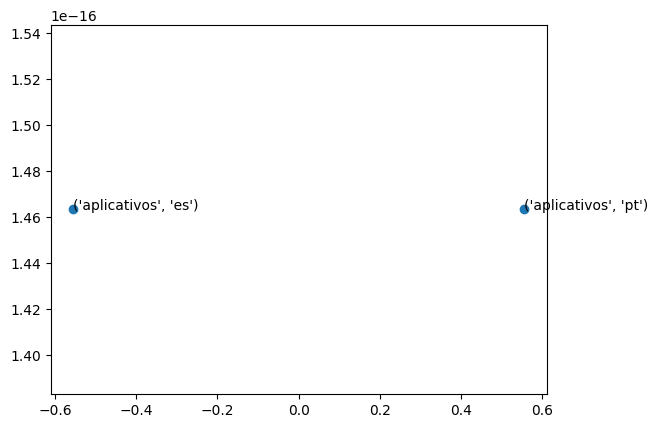

In [11]:
plot_course_encodings(labeled_pca_encodings)

# Generar encodings de los clusters

In [31]:
google_translations_aplicativos = get_google_translations_from_txt('C:/Users/Usuario/Desktop/monitoria/analisis_traducciones/data/translate', "aplicativos", new_dict)

In [32]:
new_dict_aplicativos = retrieve_lessons_text(db['lesson'], find_courses_by_name(collection_tutorials,('aplicativos', 'aplicaciones')))

Found 1 tutorials for course aplicativos 

Found 1 tutorials for course aplicaciones 



In [33]:
encoded_lessons_aplicativos = encode_course_by_lesson(new_dict_aplicativos, "aplicativos", "multi-qa-distilbert-cos-v1", google_translations_aplicativos)

In [34]:
pca_encoded_aplicativos = pca_encodings_by_lesson(encoded_lessons_aplicativos, "aplicativos")

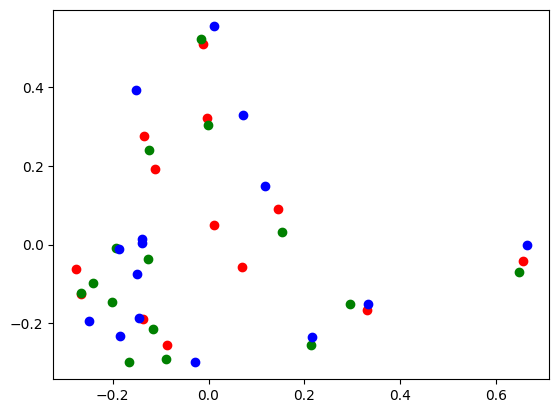

In [35]:
plot_labeled_pca_vectors(pca_encoded_aplicativos)


# Comparaciones intracluster

In [36]:
intracluster_pairwise_distances_aplicativos = calculate_intracluster_pairwise_distances(encoded_lessons_aplicativos, "aplicativos")

<AxesSubplot: >

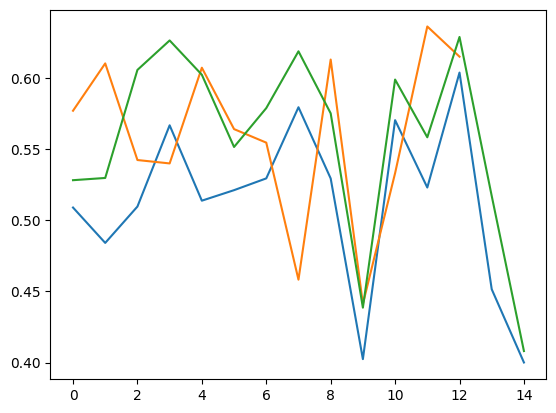

In [37]:
intracluster_pairwise_distances_aplicativos['es'].mean().plot()
intracluster_pairwise_distances_aplicativos['pt'].mean().plot()
intracluster_pairwise_distances_aplicativos['google'].mean().plot()

#Poner label en la grafica

# Comparaciones entre cluster

In [29]:
intercluster_distances_aplicativos = calculate_intercluster_pairwise_distances(encoded_lessons_aplicativos, 'aplicativos')

<AxesSubplot: >

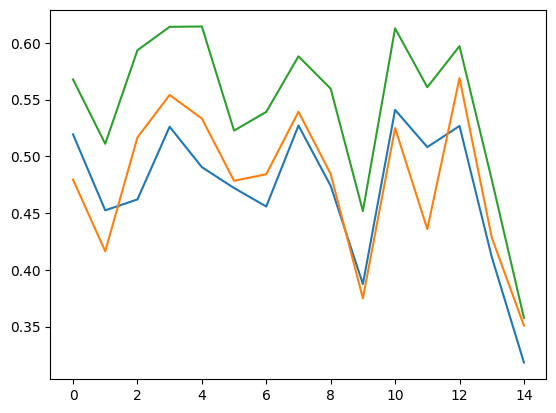

In [30]:
intercluster_distances_aplicativos['ptes'].mean().plot()
intercluster_distances_aplicativos['esgoogle'].mean().plot()
intercluster_distances_aplicativos['ptgoogle'].mean().plot()
